In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd
import numpy as np

In [ ]:
data = pd.read_csv('https://stepik.org/media/attachments/course/4852/training_mush.csv')

In [ ]:
data.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat,class
0,2,0,3,1,5,1,0,0,9,1,...,3,7,0,2,1,4,3,5,0,0
1,2,0,4,0,5,1,0,1,10,0,...,7,4,0,2,1,0,7,4,0,1
2,2,0,3,0,2,1,0,0,7,0,...,0,4,0,2,1,2,1,5,1,1
3,0,0,3,0,5,1,1,0,2,0,...,7,7,0,2,2,4,7,3,1,0
4,2,3,3,1,5,1,0,0,10,1,...,3,6,0,2,1,4,2,5,0,0


In [ ]:
X = data.drop(['class'], axis=1)
y = data['class']

In [ ]:
rf = RandomForestClassifier(random_state=0)

In [ ]:
n_jobs=-1

In [ ]:
parameters = {'n_estimators':range(10,51,10),
              'max_depth':range(1,13,2),
              'min_samples_leaf':range(1,8),
              'min_samples_split':range(2,10,2)}
clf = GridSearchCV(rf, parameters, cv=3, verbose=1, n_jobs=-1)
clf.fit(X, y)

Fitting 3 folds for each of 840 candidates, totalling 2520 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': range(1, 13, 2),
                         'min_samples_leaf': range(1, 8),
                         'min_samples_split': range(2, 10, 2),
                         'n_estimators': range(10, 51, 10)},
             verbose=1)

In [ ]:
clf.best_params_

{'max_depth': 9,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [ ]:
pred_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/testing_mush.csv')

In [ ]:
predictions = pd.DataFrame(data=clf.predict(pred_data), columns=['class'])

In [ ]:
predictions.value_counts()

class
0        1055
1         976
dtype: int64

In [ ]:
import requests
from zipfile import ZipFile
from io import BytesIO

url = "https://stepik.org/media/attachments/course/4852/testing_y_mush.csv.zip"
output_path = "/content/unzip"

response = requests.get(url)
if response.status_code == 200:
    with ZipFile(BytesIO(response.content)) as zf:
        zf.extractall(pwd=b'Cool!Move_forward!', path=output_path)


In [ ]:
correct_predictions = pd.read_csv('/content/unzip/testing_y_mush.csv')
correct_predictions

,class
0,0
1,0
2,1
3,1
4,1
...,...
2026,1
2027,0
2028,1
2029,0


<Axes: >

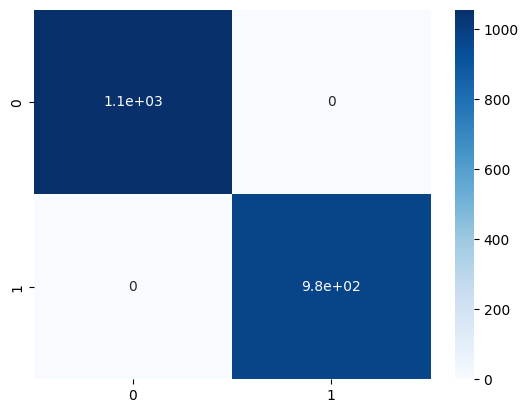

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

sns.heatmap(confusion_matrix(correct_predictions, predictions), annot=True, cmap="Blues")

##-----------------------------------------------------
##3_5_5
Перейдём к следующему датасэту.

На Землю нападают войска жукеров, и в их флоте присутствуют транспортники, истребители и крейсеры. Для борьбы с каждым типом кораблей используется свой вид оружия. Как аналитику из Штаба Обороны, вам поручено разработать модель, предсказывающую какие корабли участвуют в атаке, чтобы успешно отбить нападения на различные области планеты

Данных удалось собрать немного, и предсказывать придётся гораздо больший по объёму массив.

Обучите модель и предскажите классы кораблей для новых поступающих данных. Укажите в ответе через пробел число крейсеров, транспортников и истребителей.

От вашего ответа зависит судьба человечества!

In [ ]:
data_1 = pd.read_csv('https://stepik.org/media/attachments/course/4852/invasion.csv')
data_to_predict = pd.read_csv('https://stepik.org/media/attachments/course/4852/operative_information.csv')

In [ ]:
data_1['class'].value_counts()

fighter      225
transport    205
cruiser       70
Name: class, dtype: int64

In [ ]:
data_to_predict.head()

,g_reflection,i_reflection,speed,brightness,time_of_observance,volume
0,7.516543,3.916691,513.954279,0.177247,105908,13.267224
1,4.322988,6.967689,63.752970,0.545922,277855,39.833130
2,4.595724,9.098297,62.233948,0.389201,160662,42.014556
3,2.689675,7.964869,62.475495,0.541081,162092,42.056829
4,8.075576,5.169719,336.441261,0.174757,466853,11.779813


In [ ]:
X_train = data_1.drop(['class'], axis=1)
y_train = data_1['class']
X_test = data_to_predict

In [ ]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': range(randint(10, 1000)),
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': range(13),
    'min_samples_leaf': range(5),
    'bootstrap': [True, False]
}

rf_classifier = RandomForestClassifier(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_classifier, param_distributions=param_dist, cv=5, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_




/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
15 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py", line 340, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils

{'n_estimators': 158,
 'min_samples_split': 11,
 'min_samples_leaf': 2,
 'max_depth': 30,
 'bootstrap': True}

In [ ]:
best_rf_model = random_search.best_estimator_

In [ ]:
y_pred = best_rf_model.predict(data_to_predict)

In [ ]:
pd.Series(y_pred).value_counts()

fighter      675
transport    595
cruiser      230
dtype: int64

In [ ]:
best_rf_model.feature_importances_

array([0.2097474 , 0.05880323, 0.12988141, 0.27347629, 0.00038341,
       0.32770827])

<Axes: xlabel='Importance', ylabel='Feature'>

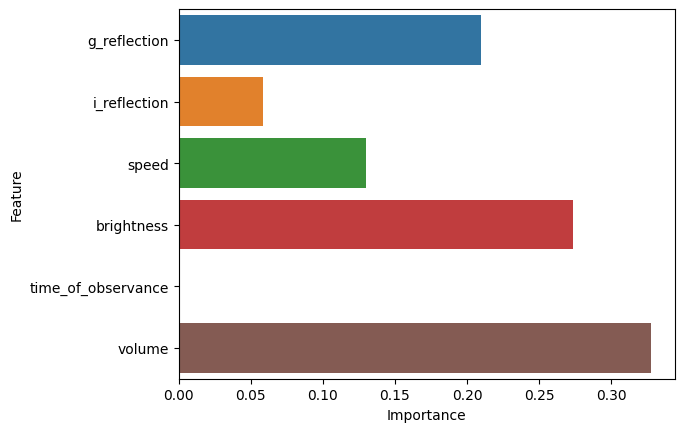

In [ ]:
import seaborn as sns


feature_importances = best_rf_model.feature_importances_
feature_names = X_train.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)

##-----------------------------------------------------
## 3_5_7
Благодаря вашим стараниям войска захватчиков были разгромлены, но война ещё не окончена! Вас повысили и перевели на новое направление (новые должности - новые задачи) - теперь нужно выявлять опасные регионы космоса, где могут находиться жукеры.

Проанализируйте имеющиеся данные об опасности разных регионов космоса и укажите наиболее вероятные причины угрозы

In [ ]:
danger_data = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [ ]:
danger_data.head()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1


In [ ]:
danger_data.corr()

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
r,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
phi,0.001023,1.000000,0.001023,0.001921,0.002875,-0.004726,-0.000803,0.003035
peradventure_index,1.000000,0.001023,1.000000,-0.003336,0.002337,0.001797,0.000326,0.005788
dustiness,-0.003336,0.001921,-0.003336,1.000000,-0.004691,-0.001290,0.003370,-0.000499
black_hole_is_near,0.002337,0.002875,0.002337,-0.004691,1.000000,-0.001874,0.002661,0.052968
buggers_were_noticed,0.001797,-0.004726,0.001797,-0.001290,-0.001874,1.000000,-0.003031,0.344469
nearby_system_has_planemo,0.000326,-0.000803,0.000326,0.003370,0.002661,-0.003031,1.000000,0.299508
dangerous,0.005788,0.003035,0.005788,-0.000499,0.052968,0.344469,0.299508,1.000000


In [ ]:
dff = pd.read_csv('https://stepik.org/media/attachments/course/4852/iris.csv')

In [ ]:
%%timeit
dff.apply(np.mean)

The slowest run took 4.08 times longer than the fastest. This could mean that an intermediate result is being cached.
2.48 ms ± 1.13 ms per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
dff.describe().loc['mean']

22.6 ms ± 6.7 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%%timeit
dff.apply('mean')

620 µs ± 46.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [ ]:
%%timeit
dff.mean(axis=0)

613 µs ± 160 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
